# Amazon(Echo) Reviews

you can download the dataset using [this link](https://www.kaggle.com/datasets/sid321axn/amazon-alexa-reviews)
![image](https://storage.googleapis.com/kaggle-datasets-images/39657/61506/3de616ea80a3f4771c21d3c5d16a0898/dataset-cover.jpg?t=2018-07-31-10-23-35)

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_table('/content/drive/MyDrive/Dataset/amazon_alexa.tsv')
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [ ]:
data.shape

(3150, 5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [ ]:
numerical = data.select_dtypes(exclude='object').columns
categorical = data.select_dtypes(include='object').columns

From here we know that dataset has 3150 instances and 5 features and it has no null values.

#Checking for unique values

In [ ]:
for i in data:
  print(f'{i}: {data[i].unique()}')
  print("---------------------------")

rating: [5 4 3 2 1]
---------------------------
date: ['31-Jul-18' '30-Jul-18' '29-Jul-18' '28-Jul-18' '27-Jul-18' '26-Jul-18'
 '25-Jul-18' '24-Jul-18' '23-Jul-18' '22-Jul-18' '21-Jul-18' '20-Jul-18'
 '19-Jul-18' '18-Jul-18' '17-Jul-18' '16-Jul-18' '15-Jul-18' '14-Jul-18'
 '13-Jul-18' '12-Jul-18' '11-Jul-18' '10-Jul-18' '9-Jul-18' '8-Jul-18'
 '7-Jul-18' '6-Jul-18' '5-Jul-18' '4-Jul-18' '3-Jul-18' '2-Jul-18'
 '1-Jul-18' '30-Jun-18' '29-Jun-18' '28-Jun-18' '27-Jun-18' '26-Jun-18'
 '25-Jun-18' '24-Jun-18' '23-Jun-18' '22-Jun-18' '21-Jun-18' '20-Jun-18'
 '19-Jun-18' '18-Jun-18' '17-Jun-18' '16-Jun-18' '15-Jun-18' '14-Jun-18'
 '13-Jun-18' '12-Jun-18' '11-Jun-18' '10-Jun-18' '9-Jun-18' '8-Jun-18'
 '7-Jun-18' '6-Jun-18' '5-Jun-18' '4-Jun-18' '3-Jun-18' '2-Jun-18'
 '1-Jun-18' '31-May-18' '30-May-18' '29-May-18' '28-May-18' '27-May-18'
 '26-May-18' '25-May-18' '24-May-18' '23-May-18' '22-May-18' '21-May-18'
 '20-May-18' '19-May-18' '18-May-18' '17-May-18' '16-May-18']
--------------------------

# Statsitical Analysis

In [ ]:
data.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


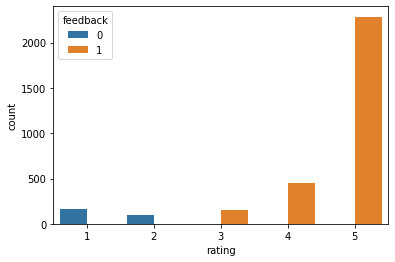

In [ ]:
sns.countplot(data=data,x='rating',hue='feedback')

From the chart we infer that rating and feedback are associated.If the rating less than or equal to 2 means feeedback has 0 and greater than 2 means feedback has 1. Here feedback play as a target variable.

In [ ]:
data = data.drop(['variation','rating'],axis=1)

In [ ]:
 import nltk
 from nltk import word_tokenize
 import string
 import re
 from nltk import tokenize
 from nltk.corpus import stopwords
 from collections import Counter
 from wordcloud import WordCloud
 from nltk import ngrams

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
cnt = Counter()
stop = stopwords.words('english')

In [ ]:
data['verified_reviews'] = data['verified_reviews'].str.lower()
data['verified_reviews'] = data['verified_reviews'].str.replace("[^\w\s]"," ")
data['verified_reviews'] = data['verified_reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))

<ipython-input-14-4c8eb24fe220>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['verified_reviews'] = data['verified_reviews'].str.replace("[^\w\s]"," ")


In [ ]:
data

,date,verified_reviews,feedback
0,31-Jul-18,love echo,1
1,31-Jul-18,loved,1
2,31-Jul-18,sometimes playing game answer question correct...,1
3,31-Jul-18,lot fun thing 4 yr old learns dinosaurs contro...,1
4,31-Jul-18,music,1
...,...,...,...
3145,30-Jul-18,perfect kids adults everyone,1
3146,30-Jul-18,listening music searching locations checking t...,1
3147,30-Jul-18,love things running entire home tv lights ther...,1
3148,30-Jul-18,complaint sound quality great mostly use comma...,1


In [ ]:
text = []
for i in data['verified_reviews']:
  text.append(i.split())
words = []
for i in text:
  for j in i:
    words.append(j)
fdist = nltk.FreqDist(words)
print(fdist.most_common(10))

[('love', 956), ('echo', 839), ('great', 729), ('alexa', 632), ('music', 540), ('like', 504), ('use', 469), ('works', 381), ('one', 352), ('easy', 342)]


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


([<matplotlib.patches.Wedge at 0x7fb01d7f8580>,
 [Text(0.9530287745891549, 0.5493051563612832, 'love'),
  Text(0.07274387297737776, 1.0975920594393216, 'echo'),
  Text(-0.7824829127903735, 0.7731238524266942, 'great'),
  Text(-1.099326171044408, 0.038496359007585954, 'alexa'),
  Text(-0.904123970294213, -0.6265459650651574, 'music'),
  Text(-0.4220632065535229, -1.0158064036388816, 'like'),
  Text(0.15172661224407702, -1.0894856745900496, 'use'),
  Text(0.6240711412872417, -0.9058339862317155, 'works'),
  Text(0.928089584706907, -0.5904656829643542, 'one'),
  Text(1.080812466102478, -0.20455906999563733, 'easy')],
 [Text(0.5198338770486299, 0.29962099437888173, '16.64%'),
  Text(0.039678476169478775, 0.5986865778759936, '14.61%'),
  Text(-0.42680886152202185, 0.42170391950546954, '12.69%'),
  Text(-0.5996324569333135, 0.020998014004137793, '11.00%'),
  Text(-0.49315852925138887, -0.34175234458099485, '9.40%'),
  Text(-0.23021629448373976, -0.5540762201666627, '8.77%'),
  Text(0.0827599

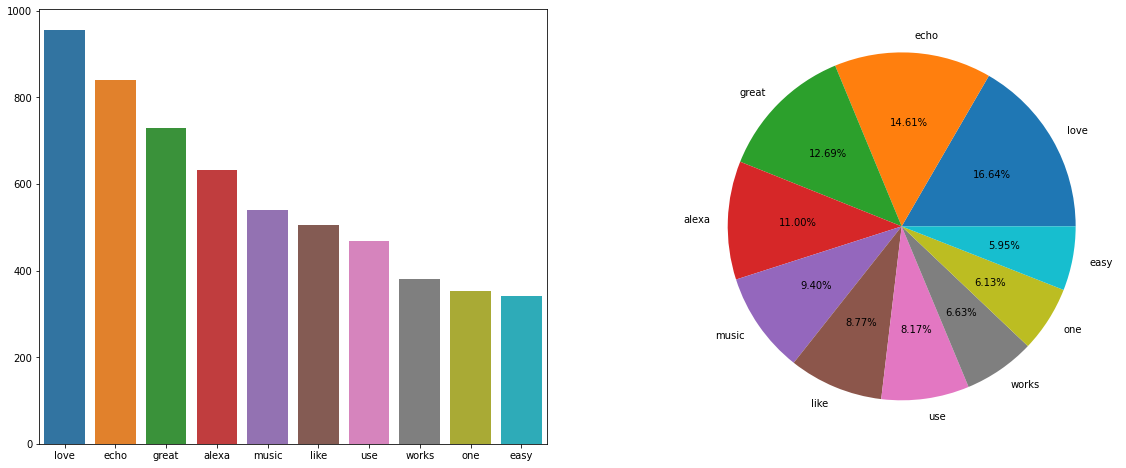

In [ ]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
keys = [i[0] for i in fdist.most_common(10)]
values = [i[1] for i in fdist.most_common(10)]
sns.barplot(keys, values)

plt.subplot(1, 2, 2)
plt.pie(values, labels=keys, autopct="%0.2f%%")

Split the dataset based on feedback as poitive and negative.

In [ ]:
positive_reviews =data.loc[data['feedback'] == 1,["verified_reviews"]]
reviews_p = ' '.join(positive_reviews['verified_reviews'])

In [ ]:
negative_reviews =data.loc[data['feedback'] == 0,["verified_reviews"]]
reviews_n = ' '.join(negative_reviews['verified_reviews'])

In [ ]:
cloud = WordCloud()

Text(0.5, 1.0, 'Negative word cloud')

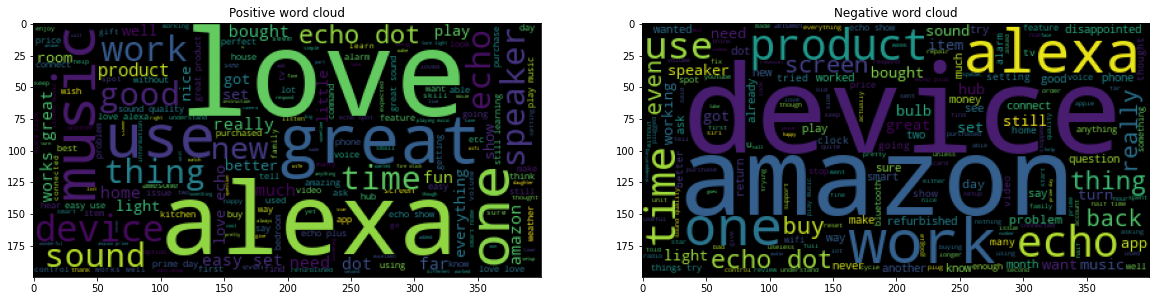

In [ ]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
positive_cloud = WordCloud()
positive_cloud = cloud.generate(reviews_p)
plt.imshow(positive_cloud)
plt.title("Positive word cloud")

plt.subplot(1, 2, 2)
negative_cloud = WordCloud()
negative_cloud = cloud.generate(reviews_n)
plt.imshow(negative_cloud)
plt.title("Negative word cloud")

In [ ]:
data["word_count"] = data['verified_reviews'].apply(lambda x: len(str(x).split(' ')))

Text(0.5, 1.0, 'Word Count')

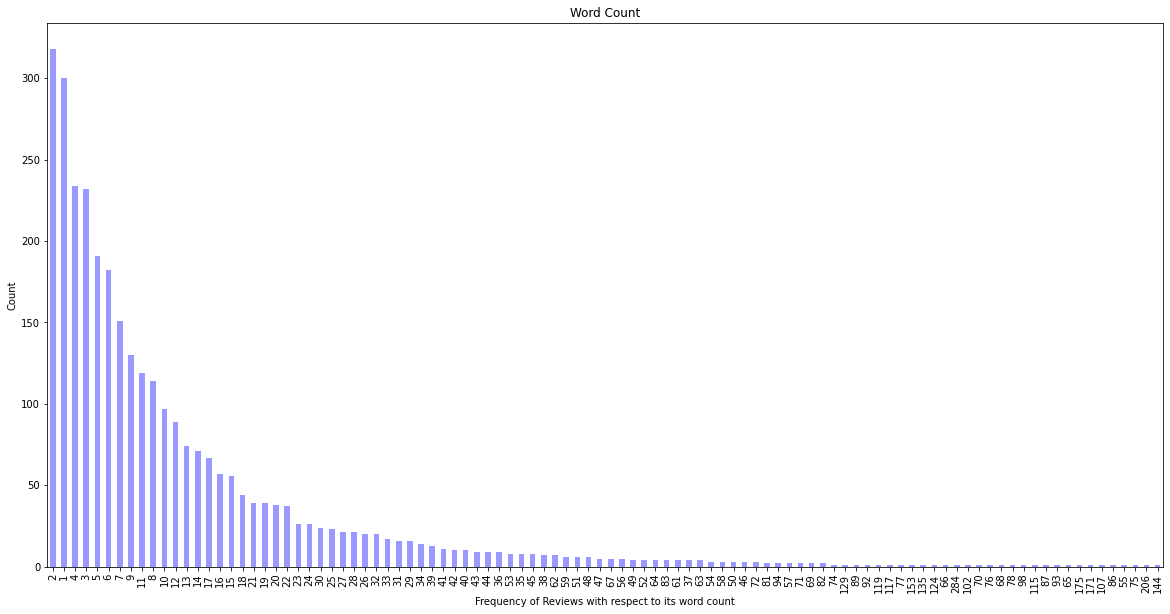

In [ ]:
plt.figure(figsize = (20,10))
data['word_count'].value_counts().plot(kind = 'bar',color = 'blue', alpha = 0.4)
plt.xlabel('Frequency of Reviews with respect to its word count')
plt.ylabel('Count')
plt.title('Word Count')

In [ ]:
data['twograms'] = data['verified_reviews'].apply(lambda x: ngrams(x.split(),2))

In [ ]:
data['threegrams'] = data['verified_reviews'].apply(lambda x: ngrams(x.split(),3))

In [ ]:
new_text = ''
for var in data['verified_reviews']:
 var = str(var)
 tokens = var.split()
 new_text += " ".join(tokens)+" "

In [ ]:
new_text = new_text.replace('read','')
new_text.find('Read')

-1

In [ ]:
corpus = new_text.split()
len(corpus)

39749

In [ ]:
corpus[:10]

['love',
 'echo',
 'loved',
 'sometimes',
 'playing',
 'game',
 'answer',
 'question',
 'correctly',
 'alexa']

In [ ]:
vocab = set(corpus)
print(len(vocab))

3926


In [ ]:
print(list(vocab)[:10])

['user', 'forget', 'llama', 'disable', 'nonsense', 'audiobooks', 'tear', 'array', 'nite', 'structure']


In [ ]:
bigram_counts = {}
trigram_counts = {}

for i in range(len(corpus)-2):
  bigram = (corpus[i],corpus[i+1])
  trigram = (corpus[i], corpus[i+1],corpus[i+2])
  
  if bigram in bigram_counts.keys():
    bigram_counts[bigram] += 1
  else:
    bigram_counts[bigram] = 1
  if trigram in trigram_counts.keys():
    trigram_counts[trigram] += 1
  else:
    trigram_counts[trigram] = 1

In [ ]:
Bigram_df = pd.DataFrame()
Bigram_df['Bigram'] = bigram_counts.keys()
Bigram_df['Count'] = bigram_counts.values()
Bigram_df = Bigram_df.sort_values(by ='Count', ascending= False)

In [ ]:
Bigram_df.head(10)

,Bigram,Count
873,"(echo, dot)",173
899,"(works, great)",146
179,"(easy, set)",134
0,"(love, echo)",110
640,"(sound, quality)",96
491,"(prime, day)",89
1100,"(great, product)",85
3119,"(echo, plus)",85
141,"(easy, use)",82
47,"(play, music)",82


Text(0.5, 1.0, 'Frequency of Top 50 Bigrams')

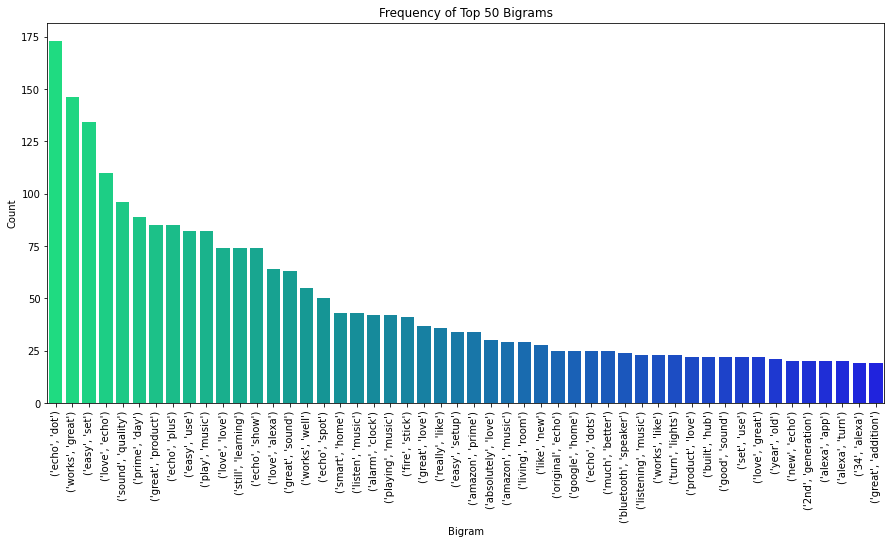

In [ ]:
plt.figure(figsize=(15,7))
plt.xticks(rotation = 90)
sns.barplot(data=Bigram_df.head(50), x='Bigram', y = 'Count', palette='winter_r')
plt.title('Frequency of Top 50 Bigrams')

In [ ]:
Trigram_df = pd.DataFrame()
Trigram_df['Trigram'] = trigram_counts.keys()
Trigram_df['Count'] = trigram_counts.values()
Trigram_df = Trigram_df.sort_values(by = 'Count', ascending= False)

Text(0.5, 1.0, 'Frequency of Top 50 Trigrams')

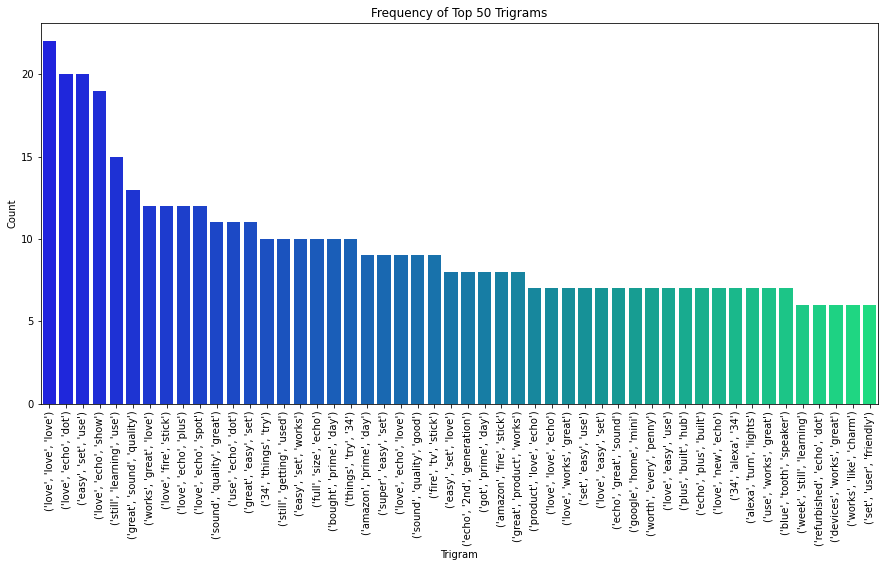

In [ ]:
plt.figure(figsize=(15,7))
plt.xticks(rotation = 90)
sns.barplot(data=Trigram_df.head(50), x='Trigram', y = 'Count', palette='winter')
plt.title('Frequency of Top 50 Trigrams')

In [ ]:
def recommend(input_):
  bigram_counts = {}
  trigram_counts = {}
  for i in range(len(corpus)-2):
    bigram = (corpus[i],corpus[i+1])
    trigram = (corpus[i], corpus[i+1],corpus[i+2])
    
    if bigram in bigram_counts.keys():
      bigram_counts[bigram] += 1
    else:
      bigram_counts[bigram] = 1
    if trigram in trigram_counts.keys():
      trigram_counts[trigram] += 1
    else:
      trigram_counts[trigram] = 1
    
  tokenized_input = input_.split()
  last_bigram = tokenized_input[-2:]
  
  vocab_probabilities = {}
  for vocab_word in vocab:
    test_trigram = (last_bigram[0], last_bigram[1], vocab_word)
    test_bigram = (last_bigram[0], last_bigram[1])
   
    test_trigram_count = trigram_counts.get(test_trigram, 0)
    test_bigram_count = bigram_counts.get(test_bigram, 0)
   
    probability = test_trigram_count / test_bigram_count
    vocab_probabilities[vocab_word] = probability

  top_suggestions = sorted(vocab_probabilities.items(), key=lambda x: x[1], reverse=True)[:5]
  a = top_suggestions
  a = dict(a)
  A = pd.DataFrame()
  A['keys'] = a.keys()
  A['count'] = a.values()
  b = sns.barplot(data =A, x = 'keys', y = 'count', palette = 'ocean')
  return A,b


In [ ]:
recommend("device you")